In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# ガンマ補正

In [2]:
def gammma_correction(img,c=1,g=2.2):
    out = np.copy(img)/255
    out = out**(1/g)
    out/=c
    
    out *=255
    out = out.astype(np.uint8)
    return out

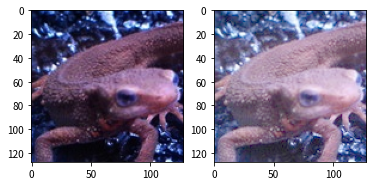

In [3]:
img = cv2.imread("./img/imori_gamma.jpg")

out = gammma_correction(img)
plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()

# 最近傍補間

In [4]:
def nearest_neighbor(img,ax,ay):
    H,W,L = img.shape
    Hd,Wd = int(H*ay),int(W*ax)
    out = np.zeros((Hd,Wd,L))
    print(out.shape)
    
    for y in range(Hd):
        for x in range(Wd):
            for layer in range(L):
                out[y,x,layer] = img[round(y//ay),round(x//ax),layer]
            
    out = out.astype(np.uint8)
    return out

(192, 192, 3)


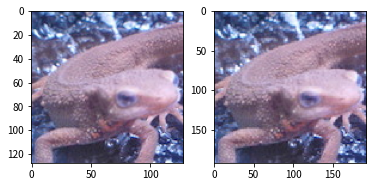

In [5]:
img = cv2.imread("./img/imori.jpg")
out = nearest_neighbor(img,1.5,1.5)

plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()

# Bi-linear補間

In [6]:
def bi_linear(img,ax=1,ay=1):
    h,w,l = img.shape
    h_a = int(ay*h)
    w_a = int(ax*w)
    # get position of resized image
    y = np.arange(h_a).repeat(w_a).reshape(h_a, -1)
    x = np.tile(np.arange(w_a), (h_a, 1))

    # get position of original position
    y = (y / ay)
    x = (x / ax)

    ix = np.floor(x).astype(np.int32)
    iy = np.floor(y).astype(np.int32)

    ix = np.minimum(ix, w-2)
    iy = np.minimum(iy, h-2)

    # get distance 
    dx = x - ix
    dy = y - iy

    dx = np.repeat(np.expand_dims(dx, axis=-1), 3, axis=-1)
    dy = np.repeat(np.expand_dims(dy, axis=-1), 3, axis=-1)
    
    # interpolation
    out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1]

    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)

    return out

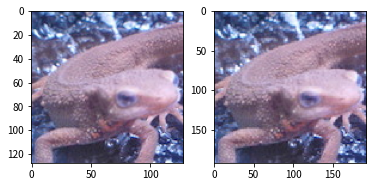

In [7]:
img = cv2.imread("./img/imori.jpg")
bi_linear(img,1.5,1.5)

plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()

# Bi-Cubic補間

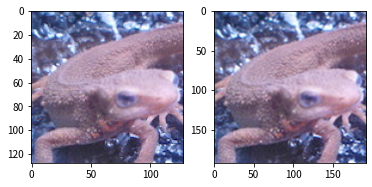

In [70]:
img = cv2.imread("./img/imori.jpg")
a=1.5
# opencvによるBi-cubic変換
out =cv2.resize(img, (int(img.shape[1]*a), int(img.shape[0]*a)), interpolation=cv2.INTER_CUBIC)

plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()